## Simple Linear Regression

Using scikit-learn implementing Simple Linear Regression

+ Dataset is related to Fuel Consumption and Carbondioxide Emission of Cars.

+ Split the data into training and test sets
+ Create a model using training set
+ Evaluate the Model using test set
+ Use model to predict unknown value

Import Liabraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Understanding the Dataset

Dataset FuelConsumption.csv contains
+ MODELYEAR e.g. 2014
+ MAKE e.g. Acura
+ MODEL e.g. ILX
+ VEHICLE CLASS e.g. SUV
+ ENGINE SIZE e.g. 4.7
+ CYLINDERS e.g 6
+ TRANSMISSION e.g. A6
+ FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
+ FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
+ FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
+ CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

Reading the Data

In [2]:
path = "H:\Files For Projects\Other Files\Doc Files\FuelConsumption.csv"
data = pd.read_csv(path)
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

In [4]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

This will ensure there is no missing value in the dataset and good to go with the model development.

In [5]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selecting some Features for model development.

In [6]:
mod_data = data[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
mod_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Plotting Each of the features

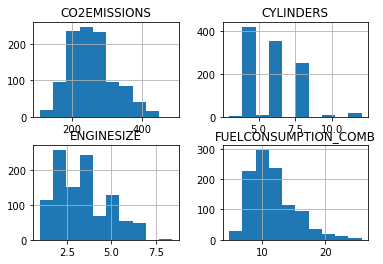

In [7]:
plot = mod_data[["CYLINDERS","ENGINESIZE","CO2EMISSIONS","FUELCONSUMPTION_COMB"]]
plot.hist()
plt.show()

Plot the Features vs Emission

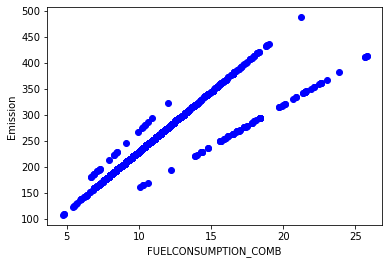

In [8]:
plt.scatter(mod_data.FUELCONSUMPTION_COMB, mod_data.CO2EMISSIONS, color = "blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

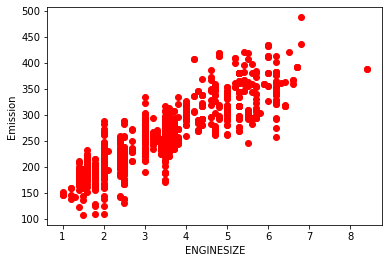

In [9]:
plt.scatter(mod_data.ENGINESIZE, mod_data.CO2EMISSIONS, color = "red")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

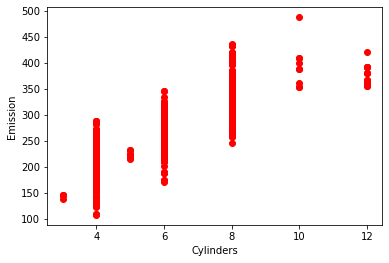

In [10]:
plt.scatter(mod_data.CYLINDERS, mod_data.CO2EMISSIONS, color = "red")
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

Creating train and Test Set

+ Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive
+ train with the training set and test with the testing set
+ This will provide a more accurate evaluation on out-of-sample accuracy.

In [12]:
df = np.random.rand(len(mod_data)) < 0.8
train = mod_data[df]
test = mod_data[~df]

In [13]:
train.shape

(862, 4)

In [14]:
test.shape

(205, 4)

**Simple Linear Regression Model**

Linear Model fits linear model between the independent X in the dataset,and dependent y by the linear approximation.

Train data distribution

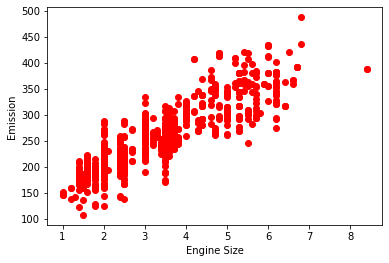

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "red")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

Modelling

In [16]:
from sklearn import linear_model

In [17]:
model = linear_model.LinearRegression()

In [19]:
train_X = np.asanyarray(train[["ENGINESIZE"]])
train_Y = np.asanyarray(train[["CO2EMISSIONS"]])

In [20]:
model.fit(train_X,train_Y)

LinearRegression()

In [22]:
## Coefficients ##
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [[39.20893085]]
Intercept:  [126.00152133]


Coefficient and Intercept in the simple linear regression, are the parameters of the fit line

**Outputs**

Text(0, 0.5, 'Emission')

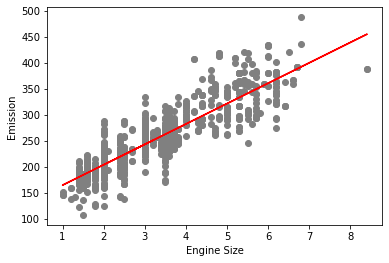

In [23]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = "grey")
plt.plot(train_X,model.coef_[0][0]*train_X + model.intercept_[0], "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")

Evaluation

+ Comparing actual value and predicted value to calculate the accuracy of regression model.
+ Done by Evaluation metrics.
+ Evaluation Metrics:
       + Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error
       + Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones
       + R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits the data

In [24]:
from sklearn.metrics import r2_score

In [25]:
test_X = np.asanyarray(test[["ENGINESIZE"]])
test_Y = np.asanyarray(test[["CO2EMISSIONS"]])

In [26]:
test_score = model.predict(test_X)

In [29]:
print("MSE:", np.mean(np.absolute(test_score - test_Y)))
print("RMSE:", np.mean((test_score - test_Y)**2))
print("R2-Score:", r2_score(test_score, test_Y))

MSE: 22.23852599770174
RMSE: 882.4139582357407
R2-Score: 0.6844670204975977


**R2-Score is 0.68, So the Linear Model is not efficient. But Dependable**